# Cardinality maps or voxets as a local measure of uncertainty
For an ensemble of 2D or 3D voxets here, of discrete property fields, cardinality is computed for each voxel of the domain as the number of different occuring values. By definition, cardinality is limited to categorical property fields. To compute cardinality over an ensemble of continuous property fields, one possibility is to discretize the continuous voxets into a limited number of classes ; another possibility is to compute a similar measure that characterize the spread of values at each given pixel, such as the range (maximum value minus minimum value) or the standard deviation for instance.

In [1]:
# import modules
import numpy as np
from datetime import datetime
import pickle
from loopui import cardinality,cardinality_continuous_eq, plot_voxet

picklefilenamecardinality = "./pickledata/synthetic-case-cardinality.pickle"
picklefilenamedata = "./pickledata/synthetic-case-data.pickle"

slice_ix=0
slice_iy=0
slice_iz=7
aspectratio = 1 # !! in pixels !!

# import data
with open(picklefilenamedata, 'rb') as f:
    [lithocode_100,lithocode_50A,lithocode_50B,scalarfield_100,scalarfield_50A,
     scalarfield_50B,nx,ny,nz,nbsamples,clblab,clblabsf] = pickle.load(f)


## Categorical variables
Cardinality can only be computed on categorical variables so it is applied only to the ensemble lithology voxets, the only truely discrete property field in the considered examples.

29-Jun-2022 (20:00:13) - COMPUTING lithocode_100 CARDINALITY START 
29-Jun-2022 (20:00:13) - COMPUTING lithocode_100 CARDINALITY END


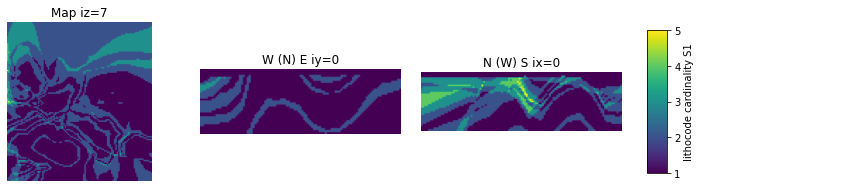

29-Jun-2022 (20:00:14) - COMPUTING lithocode_50A CARDINALITY START 
29-Jun-2022 (20:00:14) - COMPUTING lithocode_50A CARDINALITY END


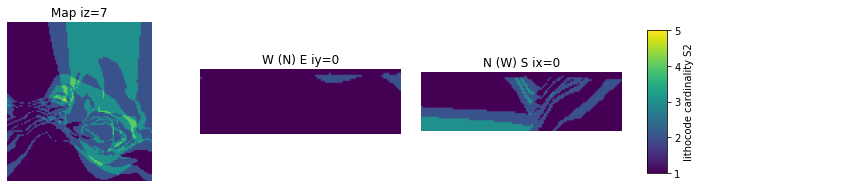

29-Jun-2022 (20:00:14) - COMPUTING lithocode_50B CARDINALITY START 
29-Jun-2022 (20:00:14) - COMPUTING lithocode_50B CARDINALITY END


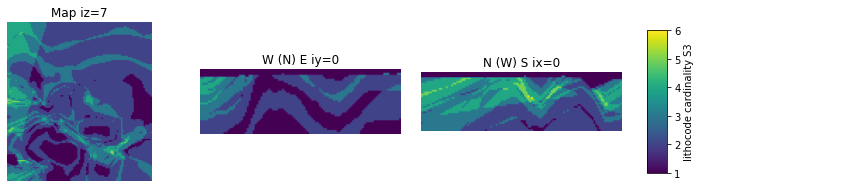

In [2]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING lithocode_100 CARDINALITY START ")
crd_lc_100 = cardinality(lithocode_100)   
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING lithocode_100 CARDINALITY END")
plot_voxet(crd_lc_100,-1,clblab+' cardinality S1',slice_ix,slice_iy,slice_iz,aspectratio,'viridis')

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING lithocode_50A CARDINALITY START ")
crd_lc_50A = cardinality(lithocode_50A)   
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING lithocode_50A CARDINALITY END")
plot_voxet(crd_lc_50A,-1,clblab+' cardinality S2',slice_ix,slice_iy,slice_iz,aspectratio,'viridis')

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING lithocode_50B CARDINALITY START ")
crd_lc_50B = cardinality(lithocode_50B)   
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING lithocode_50B CARDINALITY END")
plot_voxet(crd_lc_50B,-1,clblab+' cardinality S3',slice_ix,slice_iy,slice_iz,aspectratio,'viridis')


## Continuous variables
One possibility could be to discretize the continuous field in *n* bins.
Here we prefer to look at the range (max-min) of the continuous variable, at its standard deviation or at a combination of both.

29-Jun-2022 (20:00:15) - COMPUTING RANGE & STD scalarfield_100 START
29-Jun-2022 (20:00:15) - COMPUTING RANGE & STD scalarfield_100 END


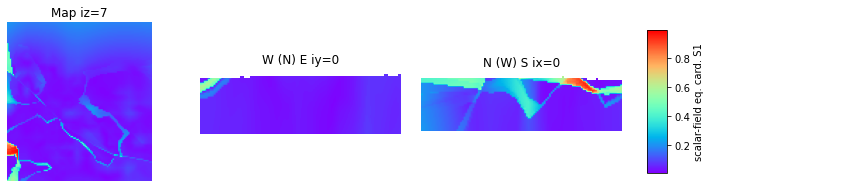

29-Jun-2022 (20:00:15) - COMPUTING RANGE & STD scalarfield_50A START
29-Jun-2022 (20:00:15) - COMPUTING RANGE & STD scalarfield_50A END


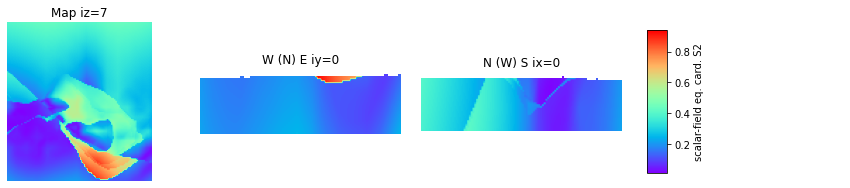

29-Jun-2022 (20:00:15) - COMPUTING RANGE & STD scalarfield_50B START
29-Jun-2022 (20:00:15) - COMPUTING RANGE & STD scalarfield_50B END


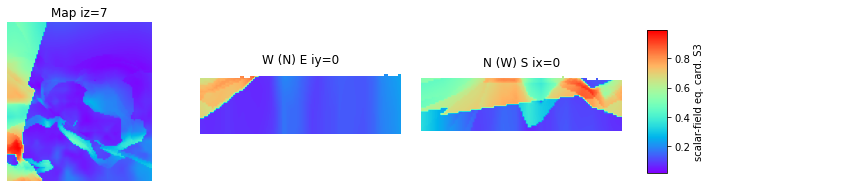

In [3]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING RANGE & STD scalarfield_100 START")
[sf_100_crdeq_rng,sf_100_crdeq_std,sf_100_crdeq_rngstd] = cardinality_continuous_eq(scalarfield_100)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING RANGE & STD scalarfield_100 END")
plot_voxet(sf_100_crdeq_rngstd,-1,clblabsf+' eq. card. S1',slice_ix,slice_iy,slice_iz,aspectratio)

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING RANGE & STD scalarfield_50A START")
[sf_50A_crdeq_rng,sf_50A_crdeq_std,sf_50A_crdeq_rngstd] = cardinality_continuous_eq(scalarfield_50A)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING RANGE & STD scalarfield_50A END")
plot_voxet(sf_50A_crdeq_rngstd,-1,clblabsf+' eq. card. S2',slice_ix,slice_iy,slice_iz,aspectratio)

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING RANGE & STD scalarfield_50B START")
[sf_50B_crdeq_rng,sf_50B_crdeq_std,sf_50B_crdeq_rngstd] = cardinality_continuous_eq(scalarfield_50B)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING RANGE & STD scalarfield_50B END")
plot_voxet(sf_50B_crdeq_rngstd,-1,clblabsf+' eq. card. S3',slice_ix,slice_iy,slice_iz,aspectratio)


## Comparison Plot
Here we compare the cardinality and the 'equivalent' continuous indicators computed from the lithocode and scalar-field 3D voxets, respectively.

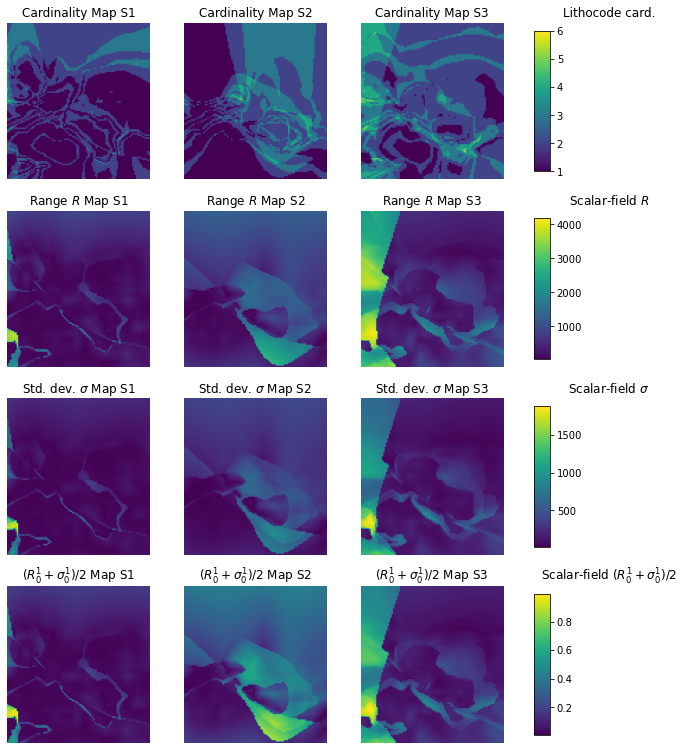

In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots(4,4) #,figsize=(13,13)
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[0,3].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')
ax[1,2].axis('off')
ax[1,3].axis('off')
ax[2,0].axis('off')
ax[2,1].axis('off')
ax[2,2].axis('off')
ax[2,3].axis('off')
ax[3,0].axis('off')
ax[3,1].axis('off')
ax[3,2].axis('off')
ax[3,3].axis('off')
axins03 = inset_axes(ax[0,3],
                   width="10%",  # width = 5% of parent_bbox width
                   height="90%",  # height : 50%
                   loc='center left'
                   )
axins13 = inset_axes(ax[1,3],
                   width="10%",  # width = 5% of parent_bbox width
                   height="90%",  # height : 50%
                   loc='center left'
                   )
axins23 = inset_axes(ax[2,3],
                   width="10%",  # width = 5% of parent_bbox width
                   height="90%",  # height : 50%
                   loc='center left'
                   )
axins33 = inset_axes(ax[3,3],
                   width="10%",  # width = 5% of parent_bbox width
                   height="90%",  # height : 50%
                   loc='center left'
                   )
ax[0,0].set_title('Cardinality Map S1')
ax[0,1].set_title('Cardinality Map S2') # 'Cardinality W (N) E'
ax[0,2].set_title('Cardinality Map S3') # 'Cardinality N (W) S'
ax[0,3].set_title('Lithocode card.')
ax[1,0].set_title('Range $R$ Map S1')
ax[1,1].set_title('Range $R$ Map S2') # 'Range $R$ W (N) E'
ax[1,2].set_title('Range $R$ Map S3') # 'Range $R$ N (W) S'
ax[1,3].set_title('Scalar-field $R$')
ax[2,0].set_title('Std. dev. $\\sigma$ Map S1')
ax[2,1].set_title('Std. dev. $\\sigma$ Map S2') # 'Std. dev. $\\sigma$ W (N) E'
ax[2,2].set_title('Std. dev. $\\sigma$ Map S3') # 'Std. dev. $\\sigma$ N (W) S'
ax[2,3].set_title('Scalar-field $\\sigma$') # ('Density ($kg/m^3$)')
ax[3,0].set_title('$(R_0^1 + \\sigma_0^1)/2$ Map S1')
ax[3,1].set_title('$(R_0^1 + \\sigma_0^1)/2$ Map S2') # ('$(R_0^1 + \\sigma_0^1)/2$ W (N) E')
ax[3,2].set_title('$(R_0^1 + \\sigma_0^1)/2$ Map S3') # ('$(R_0^1 + \\sigma_0^1)/2$ N (W) S')
ax[3,3].set_title('Scalar-field $(R_0^1 + \\sigma_0^1)/2$') # ('Density ($kg/m^3$)')
vmin = np.min([np.min(crd_lc_100),np.min(crd_lc_50A),np.min(crd_lc_50B)])
vmax = np.max([np.max(crd_lc_100),np.max(crd_lc_50A),np.max(crd_lc_50B)])
pos00 = ax[0,0].imshow(crd_lc_100[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax)
ax[0,1].imshow(crd_lc_50A[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax) # .imshow(crd[:,0,:],cmap='viridis',vmin=vmin,vmax=vmax)
ax[0,2].imshow(crd_lc_50B[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax) # .imshow(crd[:,:,0],cmap='viridis',vmin=vmin,vmax=vmax)
fig.colorbar(pos00,cax=axins03)  #,label=clblab
vmin = np.nanmin([np.nanmin(sf_100_crdeq_rng),np.nanmin(sf_50A_crdeq_rng),np.nanmin(sf_50B_crdeq_rng)])
vmax = np.nanmax([np.nanmax(sf_100_crdeq_rng),np.nanmax(sf_50A_crdeq_rng),np.nanmax(sf_50B_crdeq_rng)])
pos10 = ax[1,0].imshow(sf_100_crdeq_rng[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax)
ax[1,1].imshow(sf_50A_crdeq_rng[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax) # .imshow(rho_rng[:,0,:],cmap='viridis',vmin=vmin,vmax=vmax)
ax[1,2].imshow(sf_50B_crdeq_rng[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax) # .imshow(rho_rng[:,:,0],cmap='viridis',vmin=vmin,vmax=vmax)
fig.colorbar(pos10,cax=axins13)  #,label=clblab
vmin = np.nanmin([np.nanmin(sf_100_crdeq_std),np.nanmin(sf_50A_crdeq_std),np.nanmin(sf_50B_crdeq_std)])
vmax = np.nanmax([np.nanmax(sf_100_crdeq_std),np.nanmax(sf_50A_crdeq_std),np.nanmax(sf_50B_crdeq_std)])
pos20 = ax[2,0].imshow(sf_100_crdeq_std[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax)
ax[2,1].imshow(sf_50A_crdeq_std[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax) # .imshow(rho_std[:,0,:],cmap='viridis',vmin=vmin,vmax=vmax)
ax[2,2].imshow(sf_50B_crdeq_std[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax) # .imshow(rho_std[:,:,0],cmap='viridis',vmin=vmin,vmax=vmax)
fig.colorbar(pos20,cax=axins23)  #,label=clblab
vmin = np.nanmin([np.nanmin(sf_100_crdeq_rngstd),np.nanmin(sf_50A_crdeq_rngstd),np.nanmin(sf_50B_crdeq_rngstd)])
vmax = np.nanmax([np.nanmax(sf_100_crdeq_rngstd),np.nanmax(sf_50A_crdeq_rngstd),np.nanmax(sf_50B_crdeq_rngstd)])
pos30 = ax[3,0].imshow(sf_100_crdeq_rngstd[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax)
ax[3,1].imshow(sf_50A_crdeq_rngstd[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax) # .imshow(rho_rngstd[:,0,:],cmap='viridis',vmin=vmin,vmax=vmax)
ax[3,2].imshow(sf_50B_crdeq_rngstd[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax) # .imshow(rho_rngstd[:,:,0],cmap='viridis',vmin=vmin,vmax=vmax)
fig.colorbar(pos30,cax=axins33)  #,label=clblab
fig.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=2.5, wspace=0.1, hspace=0.2)
plt.show()

# Save computed indicators

In [5]:
with open(picklefilenamecardinality, 'wb') as f:
    pickle.dump([crd_lc_100,crd_lc_50A,crd_lc_50B,
                 sf_100_crdeq_rng,sf_100_crdeq_std,sf_100_crdeq_rngstd,
                 sf_50A_crdeq_rng,sf_50A_crdeq_std,sf_50A_crdeq_rngstd,
                 sf_50B_crdeq_rng,sf_50B_crdeq_std,sf_50B_crdeq_rngstd], f)